In [2]:
import os
import random
import yaml

In [1]:
def mkdir(path):
    '''
    创建指定的文件夹
    :param path: 文件夹路径，字符串格式
    :return: True(新建成功) or False(文件夹已存在，新建失败)
    '''
    # 引入模块
    import os

    # 去除首位空格
    path = path.strip()
    # 去除尾部 \ 符号
    path = path.rstrip("\\")

    # 判断路径是否存在
    # 存在     True
    # 不存在   False
    isExists = os.path.exists(path)

    # 判断结果
    if not isExists:
        # 如果不存在则创建目录
         # 创建目录操作函数
        os.makedirs(path)
        print(path + ' 创建成功\n')
        return True
    else:
        # 如果目录存在则不创建，并提示目录已存在
        print(path + ' 目录已存在\n')
        return False

In [3]:
def check_process(path):
    for n in os.listdir(path):
        if not os.path.exists(f'{path}/{n}/{n}.parquet'):
            return False
    return True
    

In [9]:
# for isdata in ['data','mc']:
# for isdata in ['mc']:
for isdata in ['data']:
    nanov7_dir = r'/data/pubfs/pku_visitor/public_write/download/datasets/nanov7'

#     isdata = 'data'#'data' or 'mc'
    if isdata=='data':
#         Data_merge = [
#                     'DoubleMuon_Run2018A','DoubleMuon_Run2018B','DoubleMuon_Run2018C','DoubleMuon_Run2018D',
#                      'EGamma_Run2018A','EGamma_Run2018B','EGamma_Run2018C','EGamma_Run2018D',
#                      'SingleMuon_Run2018A','SingleMuon_Run2018B','SingleMuon_Run2018C','SingleMuon_Run2018D',
#                      'MuonEG_Run2018A','MuonEG_Run2018B','MuonEG_Run2018C','MuonEG_Run2018D'
#                      ]
        Data_merge = [
                    'EGamma_Run2018C','MuonEG_Run2018D'
                     ]
        PROCESSES= [Data_merge]

        with open(f"/data/pubfs/tyyang99/jupyter_files/data_2018_nanov7.yaml", 'r') as f:
            mc_yaml = yaml.load(f, Loader=yaml.FullLoader)
    elif isdata=='mc':
        WW_polar = ['WpWpJJ_LL_polarization_EWK','WpWpJJ_TL_polarization_EWK','WpWpJJ_TT_polarization_EWK']
        WW_merge = ['WpWpJJ_EWK', 'WpWpJJ_QCD']
        WZ_EWK = ['WLLJJ_EWK']
        WZ_merge = ['WZTo3LNu_0Jets_MLL_4to50','WZTo3LNu_1Jets_MLL_4to50','WZTo3LNu_2Jets_MLL_4to50','WZTo3LNu_3Jets_MLL_4to50',
                   'WZTo3LNu_0Jets_MLL_50','WZTo3LNu_1Jets_MLL_50','WZTo3LNu_2Jets_MLL_50','WZTo3LNu_3Jets_MLL_50']
        ZZ_merge = ['ZZJJTo4L_EWK','ZZJJTo4L_QCD','ZZJJTo4L_int','ggZZ_2e2mu',
                   'ggZZ_2e2tau','ggZZ_2mu2tau','ggZZ_4e','ggZZ_4mu','ggZZ_4tau','ggZZ_4tau_ext']
        TVX_merge = ['TTGJets','TTZToQQ','TTZToQQ_ext','TTZToLLNuNu_M_10',
                     'TTWJetsToQQ','TTWJetsToLNu','tZq']
        VG_merge = ['Zgamma_EWK','Zgamma_EWK_ext','Wgamma_EWK','Wgamma_int']
        WS_merge = ['WWTo2L2Nu',
                    'ggWW_ee','ggWW_em','ggWW_et','ggWW_me','ggWW_mm','ggWW_mt','ggWW_te','ggWW_tm','ggWW_tt',
                    'TTTo2L2Nu','ST_tW_top','ST_tW_antitop',
                    'DYJetsToLL_M50','DYJets_M10to50','DYJets_M10to50_ext','ggh_ww','ggh_zz','ggh_tautau',
                    'VBF_HToZZTo4L','VBFHToWWTo2L2Nu','VBFHToTauTau',
                    'ttHToNonbb','VHToNonbb']
        Other_merge = ['WW_DS','WWW','WWZ','WZZ','ZZZ','WWG']

        PROCESSES = [WW_polar, WW_merge, WZ_EWK, WZ_merge, ZZ_merge, TVX_merge, VG_merge, WS_merge, Other_merge]
#         PROCESSES = [WW_polar]
#         PROCESSES = [WW_merge]
        with open(f"/data/pubfs/tyyang99/jupyter_files/changexs_datasets.yaml", 'r') as f:
            mc_yaml = yaml.load(f, Loader=yaml.FullLoader)
    else:
        print('!!!Wrong data type!!!')

#     output_dir = f'coffea_correctjet_newHLT_{isdata}_MET_ssww_final_output_array'
    output_dir = f'coffea_for_training_{isdata}_parquet'
    parquet_dir = f'coffea_newid_{isdata}_ssww_parquet'
#     py_file = 'process_parquet.py'
    py_file = 'prepare_for_training.py'
    pwd = os.popen('pwd').readlines()[0].replace('\n','')

    mkdir(output_dir)
    mkdir(output_dir+'/'+'log')
    

    for i,process_list in enumerate(PROCESSES):
        for process in process_list:
            if process.endswith('_ext'):
                continue
            else:
                if process+'_ext' in process_list:
                    ext = 'yes'
                else:
                    ext = 'no'
    #                 continue
            print(process)
            mkdir(output_dir+'/'+'log'+'/'+process)
            mkdir(output_dir+'/'+process)

            process_parquet_dir = pwd + '/' + parquet_dir + '/' + process
    #         check_parquet = check_process(process_parquet_dir)
    #         if process+'_ext' in process_list:
    #             check_parquet_ext = check_process(process_parquet_dir+'_ext')
    #         else:
    #             check_parquet_ext = True
    #         if check_parquet and check_parquet_ext:
            command = 'python %s -y 2018 -t %s -o %s -p %s -d %s -e %s'%(pwd+'/'+py_file, isdata, pwd+'/'+output_dir, process, process_parquet_dir, ext)
            file_command = open('%s/%s/command.sh'%(output_dir+'/'+'log', process),'w')
            file_command.write('#! /bin/bash\n\n')
            file_command.write('sleep %d\n'%(random.randint(10,900)))
            file_command.write('source /home/pku/tyyang99/.bashrc\n')
            file_command.write('cd %s\n'%(pwd))
            file_command.write(command+'\n')
            file_command.write('echo "job done!"')
            file_command.close()

            file_submit = open('%s/%s/submit.txt'%(output_dir+'/'+'log', process),'w')
            file_submit.write('Universe = vanilla\n')
            file_submit.write('Executable = %s/%s/command.sh\n'%(output_dir+'/'+'log', process))
    #         file_submit.write('arguments = %s %d\n'%(root_dir,n_root))
            file_submit.write('should_transfer_files = YES\n')
            file_submit.write('Error = %s/%s/%s.err\n'%(output_dir+'/'+'log', process, process))
            file_submit.write('Output = %s/%s/%s.out\n'%(output_dir+'/'+'log', process, process))
            file_submit.write('Log = %s/%s/%s.log\n'%(output_dir+'/'+'log', process, process))
            file_submit.write('Queue 1 \n')
            file_submit.close()

            condor_output = os.popen('condor_submit %s/%s/submit.txt'%(output_dir+'/'+'log', process)).readlines()
            for line in condor_output:
                print(line,end='')
            print()

coffea_for_training_data_parquet 目录已存在

coffea_for_training_data_parquet/log 目录已存在

EGamma_Run2018C
coffea_for_training_data_parquet/log/EGamma_Run2018C 目录已存在

coffea_for_training_data_parquet/EGamma_Run2018C 目录已存在

Submitting job(s).
1 job(s) submitted to cluster 148708.

MuonEG_Run2018D
coffea_for_training_data_parquet/log/MuonEG_Run2018D 目录已存在

coffea_for_training_data_parquet/MuonEG_Run2018D 目录已存在

Submitting job(s).
1 job(s) submitted to cluster 148709.



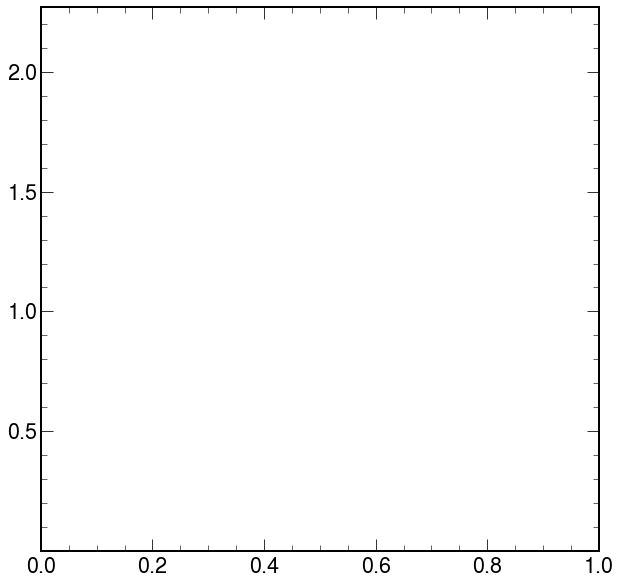

In [28]:
import numpy as np
import awkward as ak
import math as m
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplhep as hep
import boost_histogram as bh

mpl.style.use(hep.style.CMS)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_ylim([0,1.1353669626610772*2])
yticks1 = ax.yaxis.get_major_ticks()
yticks1[0].label1.set_visible(False)
yticks1[-1].label1.set_visible(False)

In [18]:
yticks1[0].label1

Text(0, 0.0, '0.00')

In [24]:
yticks1[-1].label1

TypeError: 'Text' object is not subscriptable